<a href="https://colab.research.google.com/github/pemba007/house-ml/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# !pip install imbalanced-learn
!pip install xgboost

In [92]:
# Ignoring the warning
import warnings
warnings.filterwarnings("ignore")

In [93]:
# Importing required libaries

# Data handling libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')

In [95]:
df.shape

(284807, 31)

In [96]:
df.shape

(284807, 31)

In [97]:
# Separating the target variable
y = df['Class']
df.drop(columns=['Class'], inplace = True)

# Exploraratory Data Analysis(EDA)

In [98]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

Text(0, 0.5, 'Frequency')

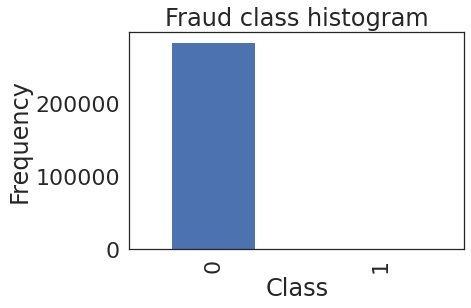

In [99]:
# Checking the distribution for target variable
count_classes = pd.value_counts(y, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [100]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print("Before sampling y:", Counter(y))
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
df, y = undersample.fit_resample(df, y)
print("After sampling y:", Counter(y))

Before sampling y: Counter({0: 284315, 1: 492})
After sampling y: Counter({0: 492, 1: 492})


Text(0, 0.5, 'Frequency')

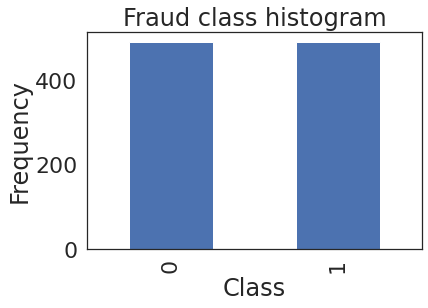

In [101]:
# Checking the distribution for target variable
count_classes = pd.value_counts(y, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

## Checking distributions

In [102]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,89207.248984,-2.409852,1.886686,-3.549321,2.270697,-1.594282,-0.695637,-2.750963,0.269140,-1.312727,...,0.180271,0.337988,0.019320,-0.040339,-0.055949,-0.009732,0.047162,0.087090,0.035511,102.709604
std,47961.134144,5.557005,3.700762,6.203725,3.207255,4.197016,1.737908,5.885872,4.930282,2.317911,...,1.198540,2.808640,1.186381,1.281960,0.582219,0.683445,0.487655,1.039470,0.428068,233.807403
min,209.000000,-30.552380,-24.726002,-31.103685,-4.489435,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-17.414483,-22.797604,-8.887017,-19.254328,-2.403191,-4.781606,-1.224085,-7.263482,-1.885448,0.000000
25%,47920.500000,-2.871640,-0.123740,-5.120349,-0.147344,-1.803200,-1.586631,-3.060742,-0.202834,-2.329244,...,-0.178192,-0.161507,-0.541855,-0.221540,-0.401705,-0.354275,-0.277708,-0.064928,-0.062666,1.790000
50%,82261.500000,-0.722094,1.052431,-1.374622,1.307692,-0.414741,-0.637103,-0.583806,0.156026,-0.740148,...,0.030550,0.154291,0.029730,-0.031383,-0.003756,0.020855,-0.004840,0.050805,0.035824,18.480000
75%,135096.750000,0.966825,2.845852,0.297566,4.263602,0.453313,0.101474,0.288724,0.853411,0.129645,...,0.433138,0.641307,0.615180,0.174422,0.377877,0.374079,0.363205,0.464387,0.224257,99.990000
max,172127.000000,2.371668,22.057729,3.177620,12.114672,11.095089,6.474115,11.464551,20.007208,5.145655,...,11.059004,27.202839,8.361985,5.466230,3.962197,2.208209,3.067907,5.002832,1.779364,2251.000000


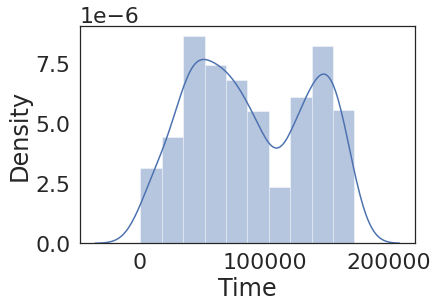

In [103]:
sns.distplot(df['Time'])

In [104]:
# Amount Feature
df['Amount'].describe()

count     984.000000
mean      102.709604
std       233.807403
min         0.000000
25%         1.790000
50%        18.480000
75%        99.990000
max      2251.000000
Name: Amount, dtype: float64

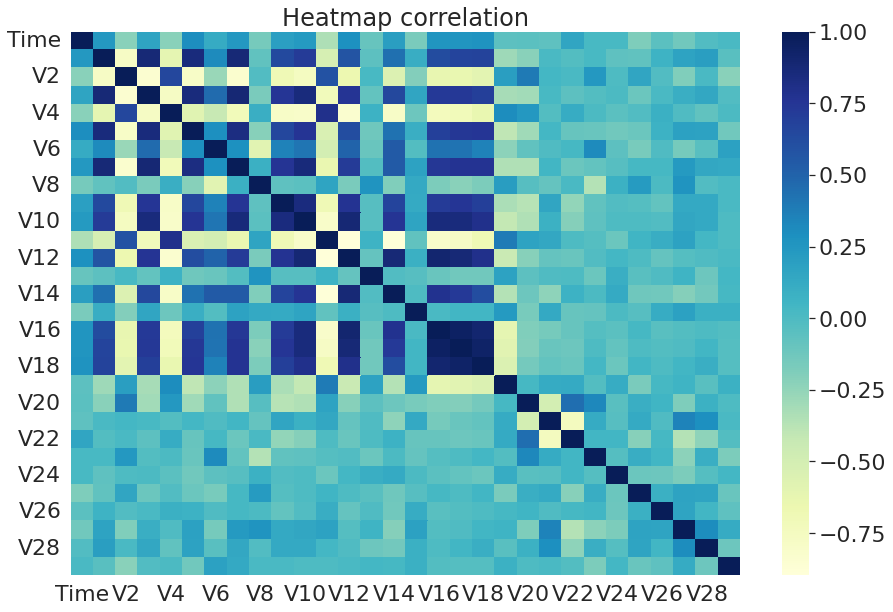

In [105]:
# Checking correlation
df_corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

Not much correlation can be found between the features

#Preprocessing

In [106]:
# Checking the datasets
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,64335.0,-0.305756,1.377713,1.897489,1.868894,0.300767,-0.381387,0.833165,-0.072738,-1.460397,...,-0.022456,-0.253754,-0.816919,0.048859,0.346888,-0.240657,-0.408221,0.027154,0.039250,5.29
1,66847.0,-0.692888,0.906936,0.998516,0.337213,-0.484549,-0.260004,0.475590,0.412192,-0.741779,...,0.068462,-0.016910,-0.303847,0.347729,0.073374,-0.778315,0.223332,-0.016316,0.101308,88.14
2,165698.0,2.046614,-0.507649,-0.873595,-0.010728,0.006617,0.670893,-0.805199,0.232236,1.004667,...,-0.132735,0.218521,0.765686,0.012904,-0.288878,-0.089631,0.656175,-0.034918,-0.063785,5.99
3,148755.0,-0.284264,0.814399,-0.022015,-0.870940,0.743063,-1.189060,1.163223,-0.125874,-0.325358,...,-0.153901,0.318012,0.817843,-0.308392,-0.020419,0.349674,-0.230532,0.002598,0.034062,38.84
4,76661.0,1.050730,0.025153,0.469603,1.356533,-0.277387,0.015871,-0.032914,0.144827,0.107913,...,-0.166921,-0.026115,0.028610,-0.067990,0.216724,0.573875,-0.343314,0.026878,0.011528,37.44


We know that time and amount feature requires normalization from the previous analysis

In [107]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

## Splitting dataset

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify = y)
# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

### Checking distribution after split

In [109]:
unique, counts = np.unique(y_train, return_counts=True)

result = np.column_stack((unique, counts)) 
print(result)

[[  0 393]
 [  1 394]]


In [110]:
unique, counts = np.unique(y_test, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[ 0 99]
 [ 1 98]]


# Implementing algorithms

In [111]:
# Libraries for metrics for all algorithms
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

# Library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## Implementing Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

## Hyper parameter tuning

In [113]:
parameters = {'C':[1, 10], 'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

clf = GridSearchCV(logReg, parameters, n_jobs=-1, scoring="roc_auc")
clf.fit(X_train, y_train)


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10],
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             scoring='roc_auc')

In [114]:
clf.best_estimator_

LogisticRegression(C=1, solver='saga')

In [115]:
# Predicting with the best parameters
y_pred = clf.predict(X_test)

### Metrics for Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



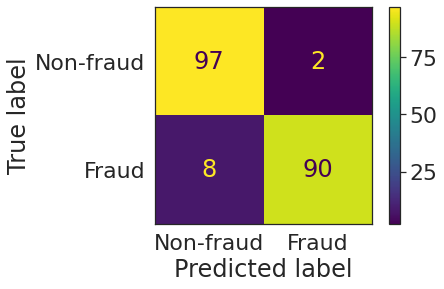

In [116]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

## Implementing Support Vector Machine

---



In [117]:
from sklearn.svm import SVC

svm = SVC()

### Hyperparameter Tuning

In [118]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5]}

clf = GridSearchCV(svm, parameters, n_jobs=-1, scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5], 'kernel': ('linear', 'rbf')},
             scoring='roc_auc')

In [119]:
# Predicting with the best parameters
y_pred = clf.predict(X_test)

## Metrics for Support Vector Machine

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



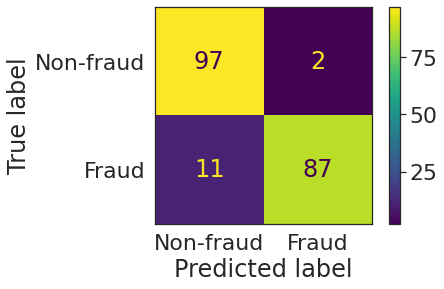

In [120]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

## Implementing Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

### Training the model

In [122]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

## Metrics for Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        99
           1       0.95      0.86      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



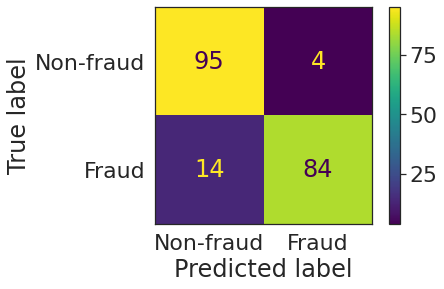

In [123]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

## Implementing Random Forest



In [124]:
from sklearn.ensemble import RandomForestClassifier

rdc = RandomForestClassifier(n_jobs=-1, max_depth = 20, verbose = 5)

## Hyperparameter Tuning

In [125]:
parameters = {'n_estimators':[100, 150]}

clf = GridSearchCV(rdc, parameters, n_jobs=-1, scoring="roc_auc")
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150building tree 4 of 150

building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150building tree 9 of 150
building tree 10 of 150

building tree 11 of 150building tree 12 of 150

building tree 13 of 150building tree 14 of 150

building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150

building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150building tree 32 of 150
building tree 33 of 150

building tree 34 of 150
building tree 35 of 150
building tree 36 of 150building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150

building tree 42 of 150bu

[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.4s



building tree 72 of 150building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150

building tree 79 of 150building tree 80 of 150
building tree 81 of 150

building tree 82 of 150
building tree 83 of 150building tree 84 of 150

building tree 85 of 150building tree 86 of 150
building tree 87 of 150

building tree 88 of 150building tree 89 of 150
building tree 90 of 150

building tree 91 of 150building tree 92 of 150
building tree 93 of 150
building tree 94 of 150
building tree 95 of 150
building tree 96 of 150
building tree 97 of 150
building tree 98 of 150
building tree 99 of 150
building tree 100 of 150
building tree 101 of 150
building tree 102 of 150
building tree 103 of 150
building tree 104 of 150

building tree 105 of 150building tree 106 of 150

building tree 107 of 150building tree 108 of 150
building tree 109 of 150

building tree 110 of 150
building tree 111 of 150
building tree 112 of 150bui

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=20, n_jobs=-1,
                                              verbose=5),
             n_jobs=-1, param_grid={'n_estimators': [100, 150]},
             scoring='roc_auc')

## Metrics for Random Forest

In [126]:
clf.best_params_

{'n_estimators': 150}

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        99
           1       0.95      0.86      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



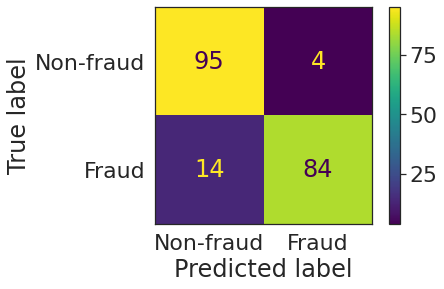

In [127]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

## Implementing Artificial Neural Network

In [128]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter = 300)

In [129]:
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(clf, parameters, n_jobs=-1, scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=300), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='roc_auc')

In [130]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

## Metrics for Artificial Neural Network

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        99
           1       0.95      0.86      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



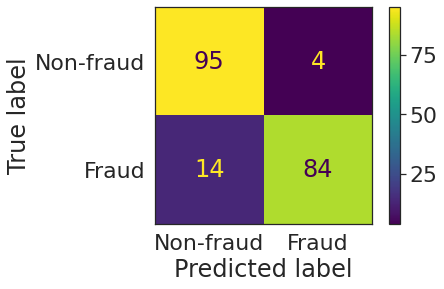

In [131]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()

# Implementing XGBoost CLassifier

In [132]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective="binary:logistic")

clf.fit(X_train, y_train)


XGBClassifier()

## Hyperparameter Tuning

In [133]:
parameters = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

clf = GridSearchCV(clf, parameters, n_jobs=-1, scoring="roc_auc")


## Metrics for XGBoost Classifier

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        99
           1       0.95      0.86      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



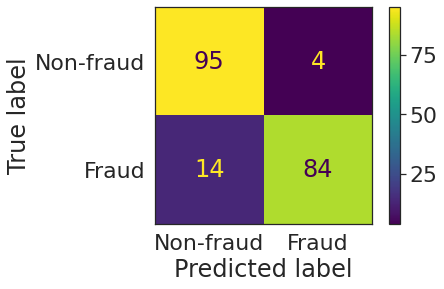

In [134]:
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Non-fraud', 'Fraud']).plot()
plt.show()